# ECE/CS 434 | MP1: Visualizing Data
<br />
<nav>
    <span class="alert alert-block alert-warning">Due on Monday Feb 6th 11:59PM on Gradescope</span> 
</nav><br> 


### Name: Saif Ur Rahman
### Net ID: saifu2

 

## Objective
The goal of this MP is for you to become familiar with sensor data collected from mobile phones. We will work with accelerometer data, microphone recordings and Wi-Fi RSSI. The data provided to you will be relevant to future MPs, so hopefully this will give you a head start. After completing this MP, you should be able to:
- Quickly visualize readings from various mobile phone sensors.
- Interpret various aspects of sensor data from plots.

---
## Imports & Setup
The following `code` cell, when run, imports the libraries that you will require for the coding part of this MP. The use of other standard libraries is allowed but uneeded.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/CS 434 Real-World Algorithms for IoT and Data Science/MP1_data_visualization/MP1_data_visualization"

/content/drive/MyDrive/CS 434 Real-World Algorithms for IoT and Data Science/MP1_data_visualization/MP1_data_visualization


In [3]:
%ls

accl/  microphone/  MP1.ipynb  wifi/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

---
## Accelerometer
Three sets of accelerometer data are provided to you in `accl/*.csv` files. For each file, there are three columns, representing the accelerometer readings in three local axes x, y and z (in that order) (unit: $m / s^{2}$). Please refer to [this](https://www.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png) for the defination of axes. The accelerometer is sampled at $100\text{ Hz}$. 

#### Exercise 1
For each set of data (CSV file), plot the accelerometer readings over time. Clearly label the x and y axes of the plot, and create a legend indicating what local axes (x, y, or z) each line in your plot corresponds to. For each set of readings, you may instead use different subplots for different accelerometer axes,  if you find that more readable.

Please enter your solution in the `code` cell below:

In [6]:
# Exercise 1 code here:

# create a list of paths to each of the accelerometer files
files = ["a.csv", "b.csv", "c.csv"]
path = os.path.join(os.getcwd(), "accl")

# read the files using pandas
df1 = pd.read_csv(os.path.join(path, files[0]), names=['x', 'y', 'z'])
df2 = pd.read_csv(os.path.join(path, files[1]), names=['x', 'y', 'z'])
df3 = pd.read_csv(os.path.join(path, files[2]), names=['x', 'y', 'z'])

In [ ]:
def plot_accl_graphs(dataframe, filename):
  """
    dataframe: the pandas dataframe object that has the accelerometer data
    filename: the name of the file as stored in accl folder
  """
  fig, ax = plt.subplots(3,1,figsize=(18, 12))

  fig.suptitle('{0}, acceleration vs time plots'.format(filename), fontsize=16)

  ax[0].plot(dataframe['x'], label = 'x acceleration', color='b')
  ax[0].set_xlabel('time / 10ms')  # Add an x-label to the axes.
  ax[0].set_ylabel('acceleration / m/$s^2$')  # Add a y-label to the axes.
  ax[0].set_title("x acceleration vs time")  # Add a title to the axes.
  ax[0].legend();  # Add a legend.
  ax[0].grid(True);

  ax[1].plot(dataframe['y'], label = 'y acceleration', color='g')
  ax[1].set_xlabel('time / 10ms')  # Add an x-label to the axes.
  ax[1].set_ylabel('acceleration / m/$s^2$')  # Add a y-label to the axes.
  ax[1].set_title("y acceleration vs time")  # Add a title to the axes.
  ax[1].legend();  # Add a legend.
  ax[1].grid(True);

  ax[2].plot(dataframe['z'], label = 'z acceleration', color='r')
  ax[2].set_xlabel('time / 10ms')  # Add an x-label to the axes.
  ax[2].set_ylabel('acceleration / m/$s^2$')  # Add a y-label to the axes.
  ax[2].set_title("z acceleration vs time")  # Add a title to the axes.
  ax[2].legend();  # Add a legend.
  ax[2].grid(True);

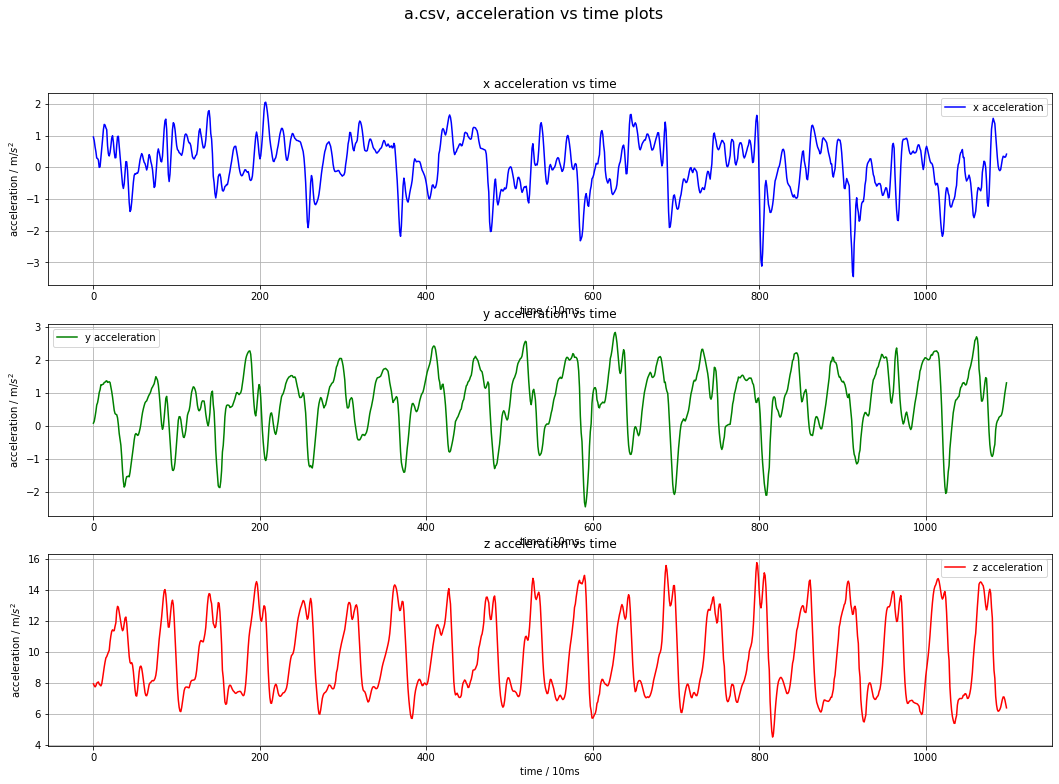

In [ ]:
plot_accl_graphs(df1, "a.csv")

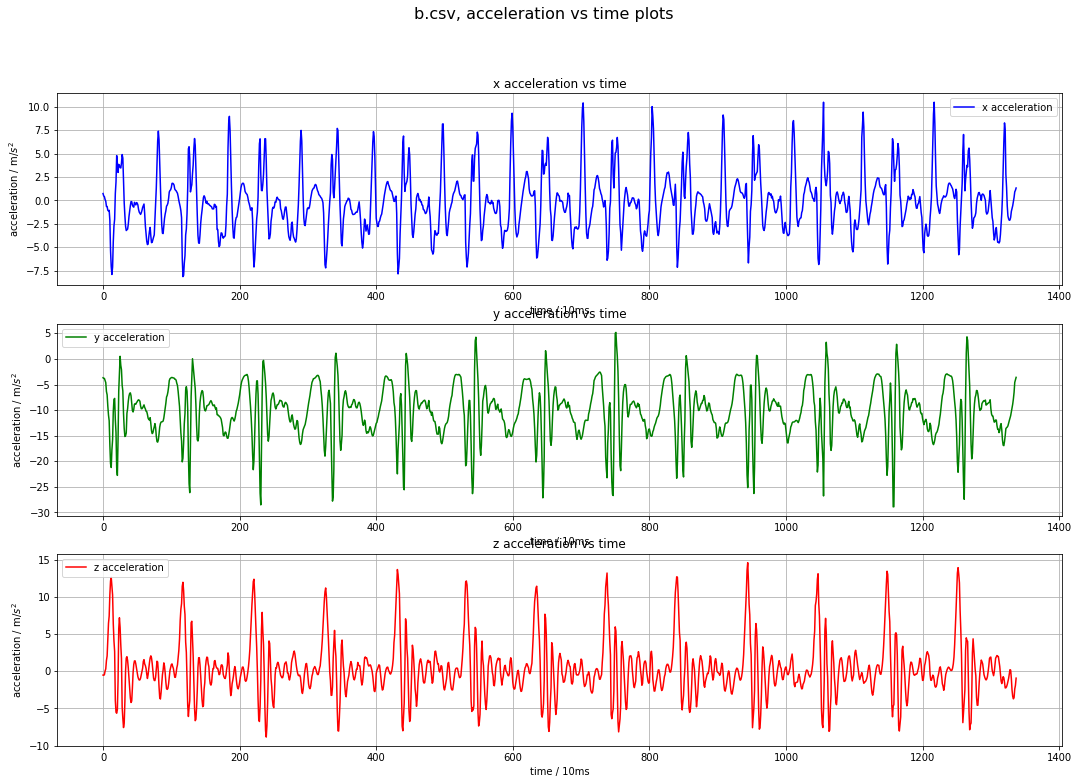

In [ ]:
plot_accl_graphs(df2, "b.csv")

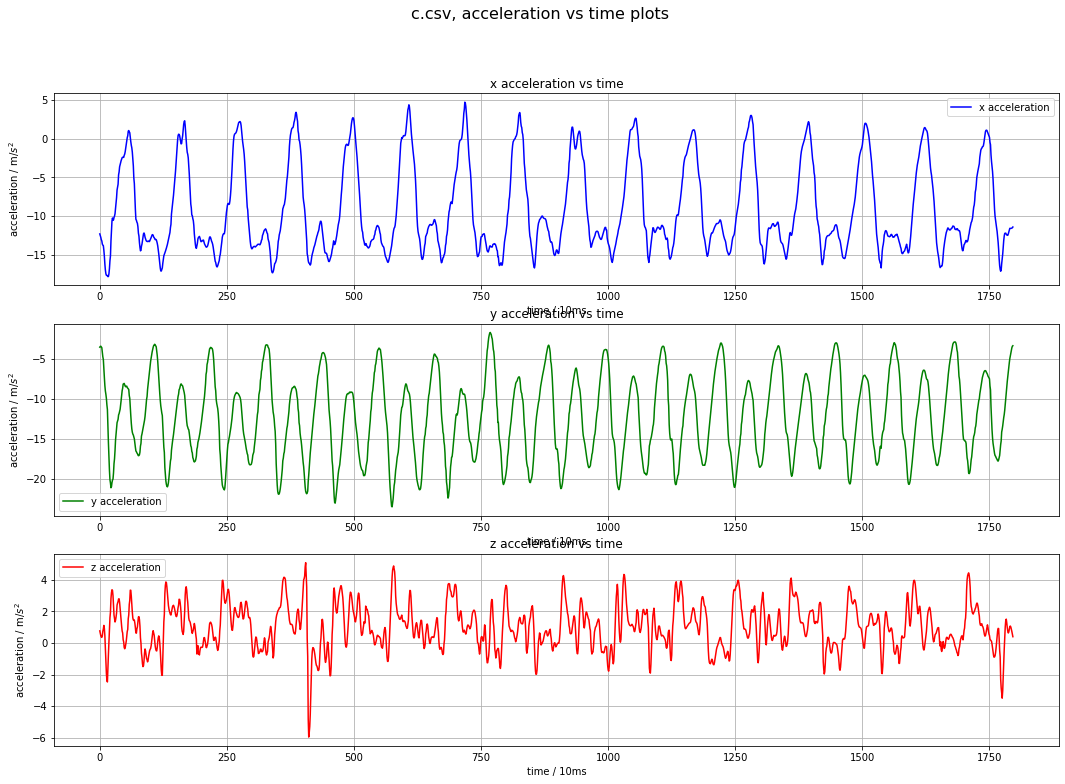

In [ ]:
plot_accl_graphs(df3, "c.csv")

#### Exercise 2:
The accelerometer readings were collected under three circumstances: 
<ol type="A">
  <li>Senario A: walking with phone in pant pocket</li>
  <li>Senario B: walking with phone held in the hand statically as if the user is looking at it while walking</li>
  <li>Senario C: walking with phone in hand and the hand swinging</li>
</ol>

Carefully observe the graphs from Exercise 1 and identify which scenario each corresponds to. 

<div class="alert alert-block alert-info"><b>Hint:</b> When phone is held statically in the hand, the local y axis is relatively aligned with the walking direction. Acceleration in which direction is relatively small? When phone is in hand and the hand is swinging, the local z axis is perpendicular to your palm. Acceleration in which direction is relatively small? </div>

Please enter your answer in the `markdown` cell below: 

**Exercise 2 Answer**:
* Data `a.csv` is for: **Scenaio B**. In this scenario, the x-axis is perpendicular to the forward motion. This axis is also perpendiculer to the up and down motion. Any movement or acceleration in x-axis would indicate side to side movement of the user. Since a.csv has very little acceleration in x-axis, it is the data for scenario B.
* Data `b.csv` is for: **Scenario A**. The data for Scenario's B and C was easy to identify because in each of these scenarios, there was little movement in one direction. In scenario A, there is movement in almost all directions because it is not know how the phone is placed in the pocket.
* Data `c.csv` is for: **Scenario C**, now, there is little movement in the z-direction as the z-axis is normal to both the forward direction of motion and up and down motion. Therefore, acceleration in the z-axis is expected to be minimal. This is protrayed only in c.csv. The sinusiodal signal in y-axis in c.csv is also an indication of the swinging motion of the phone in the hand.

#### Exercise 3

For the senario B (phone held static) in the exercise above, what is the final velocity of the phone in the y direction? Assume that the initial velocity is $0$, and that the phone orientation is unchanged throughout the process.

<div class="alert alert-block alert-info"><b>Hint:</b> You will need to perform integration. </div>

Please enter your solution in the `code` cell below.

In [7]:
# Exercise 3 code here:

# use the formula v = u + a*t

accl_y = list(df1['y'])
v = 0 # initial velocity
t = 1/100 # time interval between 2 consecutive acceleration measurements

# Integration performed in this for loop. Note this is the summation interpretation (monte carlo integration) of integration as discrete time is involved.
for a in accl_y:
  v = v + a*t

print("The final velocity of the phone in the y direction is: ", v )

The final velocity of the phone in the y direction is:  7.899058974289999


#### Exercise 4

Typical walking speed is $1.5\frac{m}{s}$. What causes the discrepancy between this expected speed and your result in Exercise 3?

Please enter your answer in the `markdown` cell below: 

**Exercise 4 Answer**: This typical walking speed must be the average walking speed of the center of mass of the human user. Actually, different body parts have different instantenous speeds all of which depend on the anatomy of the human body. There are many cases that can explain this discrepancy, some of which are listed below:
1. The hands move forward and backwards relative to the average forward motion of walking while trying to keep the phone static or parallel. The hands might be moving forward relative to the forward direction of movement, resulting in a greater speed of the phone (7.9 m/s) in the y-direction.
2. The user might be accelerating forward causing an increase in speed of the phone. In this case, the phone is still static relative to the user.

---
## Microphone
You are given two microphone recordings from two different microphones on the same device. In `microphone/1.csv`, the first column corresponds to samples collected by the first microphone and the second column corresponds to the second microphone. The sampling rate of the microphones are $16\text{ kHz}$. 

#### Exercise 5
Plot the microphone recordings over time. Clearly label the x and y axes, and create a legend to indicate which microphone each line corresponds to. Note that it is okay if the lines look like they overlap.

Please enter your solution in the `code` cell below.

In [9]:
%ls microphone

1.csv


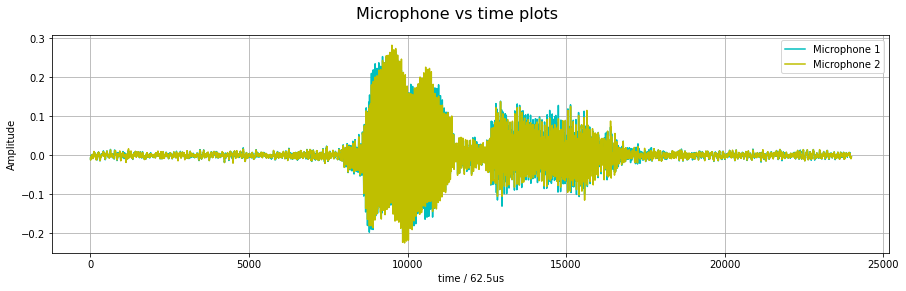

In [10]:
# Exercise 5 code here:
# read the files using pandas

df4 = pd.read_csv(os.path.join(os.getcwd(), "microphone", "1.csv"), names=['m1', 'm2'])
df4.head(5)

fig, ax = plt.subplots(figsize=(15, 4))
fig.suptitle('Microphone vs time plots', fontsize=16)
ax.plot(df4['m1'], label = 'Microphone 1', color='c')
ax.plot(df4['m2'], label = 'Microphone 2', color='y')
ax.set_xlabel('time / 62.5us')  # Add an x-label to the axes.
ax.set_ylabel('Amplitude')  # Add a y-label to the axes.
ax.legend();  # Add a legend.
ax.grid(True);

#### Exercise 6
Zoom in to your plot from Exercise 5. How many samples does mic 1 lag behind mic 2 by? You only need to provide a rough estimate.

You may use the optional `code` cell below if you need to plot again. Please enter your answer in the `markdown` cell below: 

In [11]:
df4["m1"].shape

(24000,)

In [12]:
df4["m2"].shape

(24000,)

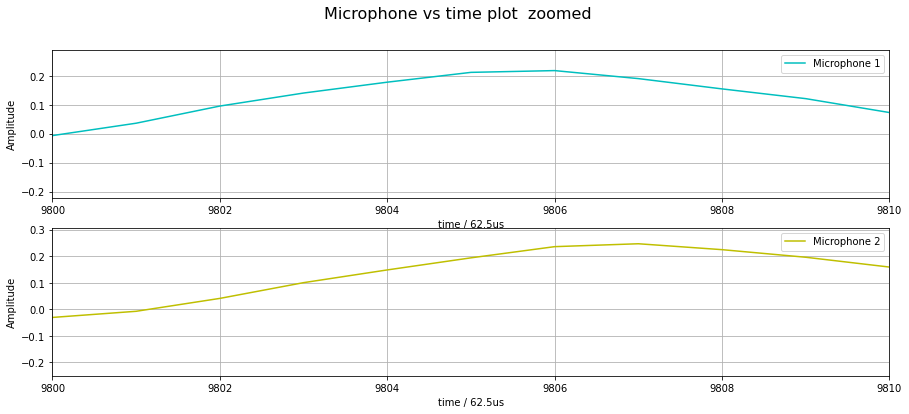

In [30]:
# (Optional) Exercise 6 code here:
fig, ax = plt.subplots(2,1,figsize=(15, 6))
fig.suptitle('Microphone vs time plot  zoomed', fontsize=16)
ax[0].plot(df4['m1'], label = 'Microphone 1', color='c')
ax[1].plot(df4['m2'], label = 'Microphone 2', color='y')
ax[0].set_xlabel('time / 62.5us')  # Add an x-label to the axes.
ax[0].set_ylabel('Amplitude')  # Add a y-label to the axes.
ax[1].set_xlabel('time / 62.5us')  # Add an x-label to the axes.
ax[1].set_ylabel('Amplitude')  # Add a y-label to the axes.
ax[0].set_xlim(9800, 9810)
ax[1].set_xlim(9800, 9810)
ax[0].legend();  # Add a legend.
ax[0].grid(True);
ax[1].legend();  # Add a legend.
ax[1].grid(True);

**Exercise 6 Answer**: Mic 1 lags behind Mic 2 by 1 sample.

---
## Wi-Fi
Wi-Fi RSSI (Received Signal Strength Indicator) is a measurement of how well your device can receive signals from a given access point or router. A user walks around a room that has 3 Wi-Fi access points. You are given the RSSI reading from their smartphone in this format: $(\text{SSID}, \text{HH:MM:SS}, \text{RSSI})$. SSID (Service Set Identifier) is a unique identifier that distinguishes between access points.

#### Exercise 7
For every unique access point, plot the RSSI over time. Clearly label the x and y axes, and create a legend to indicate which access point each line corresponds to. You may create separate graphs if you think that is more readable.

Please enter your solution in the `code` cell below.

In [ ]:
%ls wifi

1-walk-1.csv  room.png


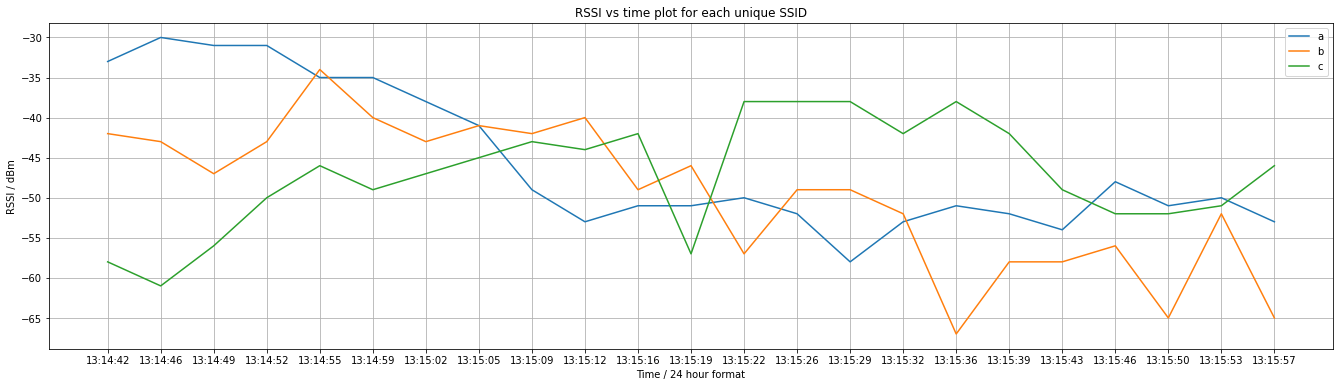

In [ ]:
# Exercise 7 code here:

df5 = pd.read_csv(os.path.join(os.getcwd(), "wifi", "1-walk-1.csv"))
df5.head()

ssid_grouped = df5.groupby('SSID')

fig, ax = plt.subplots(figsize=(23, 6))

for name, group in ssid_grouped:
    ax.plot(group['Time'], group['RSSI'], label=name)

ax.set_title("RSSI vs time plot for each unique SSID")
ax.set_xlabel("Time / 24 hour format")
ax.set_ylabel("RSSI / dBm")
ax.grid(True)
ax.legend()

plt.show()

#### Exercise 8
File `wifi/room.png` shows a layout of the room. The locations of the three Wi-Fi access points are annotated on the figure. Think of a possible **straight-line path** of how the user walked in the room. What are the starting and ending coordinates of this straight-line path? Reading your graph from Exercise 7 and eyeballing to give a rough estimate would suffice.

Please enter your answer in the `markdown` cell below:

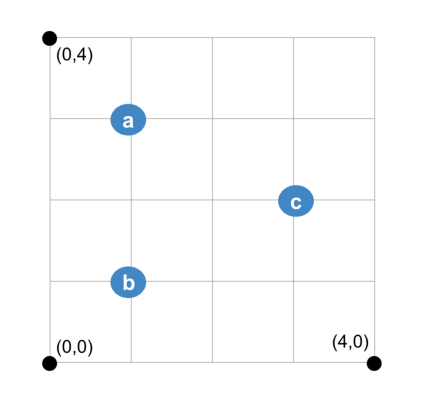

In [ ]:
img = plt.imread(os.path.join(os.getcwd(), "wifi", "room.png"))

fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=200)
ax.imshow(img)
ax.axis("off")
plt.show()


**Exercise 8 Answer**:
* Starting coordinates are: ( 0 , 2.5 )
* Ending coordinates are: ( 2.2 , 2 )

---
## Submission
This Jupyter notebook is the only thing you need to submit to Gradescope. Please make sure that:
* All graphs and results are outputted and readable.
* All short-answer markdown cells are filled in.

---
## Rubric
| Exercise | Rubric                                                    | Points       |
|---------:|:----------------------------------------------------------|-------------:|
| 1        | All 3 accelerometer plots are correct and clearly labeled | $3 \times 2$ |
| 2        | Answer is correct                                         | $3$          |
| 3        | Answer is correct                                         | $1$          |
| 4        | Answer is correct                                         | $1$          |
| 5        | Microphone plot is correct and clearly labeled            | $6$          |
| 6        | Answer is correct                                         | $4$          |
| 7        | Wi-Fi plot is correct and clearly labeled                 | $6$          |
| 8        | Answer is correct                                         | $4$          |